In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def generate_linear_data():
    x = np.linspace(0, 10, 100)
    y = 1.8 * x - 3.21 + np.random.normal(0, 1, 100)
    return x, y

In [15]:
xs, ys = generate_linear_data()

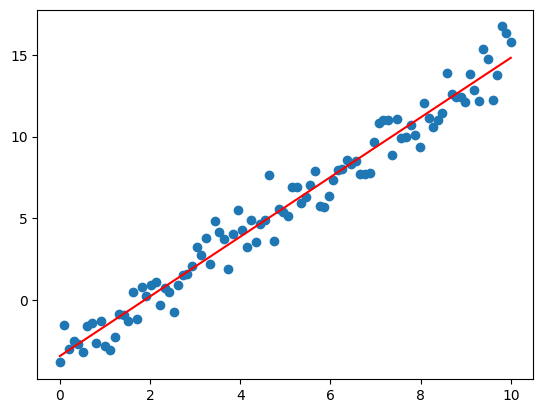

In [16]:
xs_ = np.c_[np.ones(100), xs]
W_opt = np.linalg.inv(xs_.T @ xs_) @ xs_.T @ ys.reshape(-1, 1)

y_hat = xs_ @ W_opt 
plt.scatter(xs, ys)
plt.plot(xs, y_hat, color='red')
plt.show()

In [17]:
class KalmanFilterReg():
    def __init__(self):
        # Initial Estimation
        self.w = np.array([-3, 1.5])

        # Transaction Matrix 
        self.A = np.eye(2)  

        # Noise in estimations
        self.Q = np.eye(2) * 0.01

        # Noise in observations
        self.R = np.array([[1]])*10

        # Error in covariance prediction
        self.P = np.eye(2)

    def predict(self):
        self.P = self.A @ self.P @ self.A.T + self.Q

    def update(self,x, y):
        C = np.array([[1, x]]) 
        S = C @ self.P @ C.T + self.R
        K = self.P @ C.T @ np.linalg.inv(S)

        # Update error in covariance prediction
        self.P = (np.eye(2) - K @ C) @ self.P

        # Update estimations => x_t| t
        self.w = self.w + K @ (y - C @ self.w)

    @property
    def params(self):
        return self.w[0], self.w[1]


In [18]:
Kalman = KalmanFilterReg()
kalman_preds = []

for i in range(len(xs)):
    # At the start
    Kalman.predict()

    # Update w
    x = xs[i]
    y = ys[i]

    # Update kalman
    Kalman.update(x, y)
    
    w0, w1 = Kalman.params
    kalman_preds.append(w0 + w1 * x)

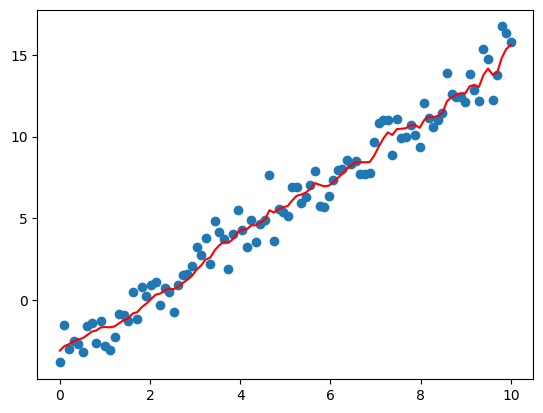

In [19]:
plt.scatter(xs, ys)
plt.plot(xs, kalman_preds, color='red')
plt.show()